In [2]:
import healpy as hp
import numpy as np

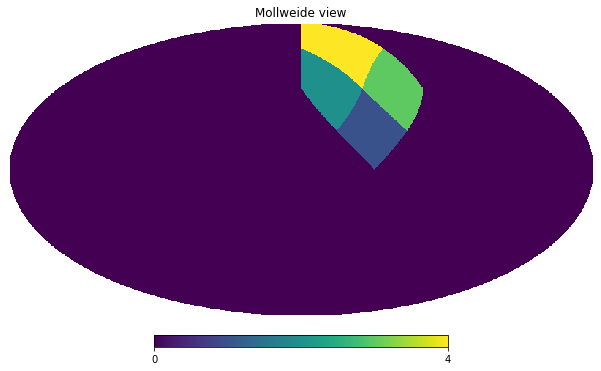

In [5]:
nside = 2
smap = np.zeros(hp.nside2npix(nside))
idx = np.arange(4) + 3 * 4
smap[idx] = np.arange(4) + 1
hp.mollview(smap, nest=True)

  3   |  11  |j   i
1   2 |01  10| \ /
  0   |  00  |  v

Обозначения:

o_... - изначальное разбиение(крупное) [original] 

f_... - итоговое разбиение(мелкое) [final]

o_nside, f_side - nside как 2^k

depth - глубина разбиения. f_nside = o_nside * (2 ^ depth)

m_len - длина стороны матрицы с данными. m_len = 2 ^ depth

pix_count - количество пикселей в матрице. pix_count = m_len ^ 2

o_pix - номер пикселя в изначальном разбиении

f_idx - индексы пикселей в итоговом разбиении

f_matr - матрица индексов

In [36]:
def one_pixel_fragmentation(o_nside, o_pix, depth):
    
    def recursive_fill(matr):
        if matr.shape[0] == 1:
            return

        mid = matr.shape[0] // 2
        np.left_shift(matr, 1, out=matr)
        matr[mid:, :] += 1

        np.left_shift(matr, 1, out=matr)
        matr[:, mid:] += 1

        for i in [0, mid]:
            for j in [0, mid]:
                recursive_fill(matr[i:i+mid, j:j+mid])
                
    m_len = 2 ** depth
    f_matr = np.full((m_len, m_len), o_pix)
    
    recursive_fill(f_matr)
    return f_matr

In [28]:
def recursive_fill(matr):
    if matr.shape[0] == 1:
        return

    mid = matr.shape[0] // 2
    np.left_shift(matr, 1, out=matr)
    matr[mid:, :] += 1

    np.left_shift(matr, 1, out=matr)
    matr[:, mid:] += 1

    for i in [0, mid]:
        for j in [0, mid]:
            recursive_fill(matr[i:i+mid, j:j+mid])

In [31]:
arr = np.full((16, 16), 3)
recursive_fill(arr)

In [32]:
nside = 2 ** 5
hmap = np.zeros(hp.nside2npix(nside))
k = 3
for i in range(16):
    for j in range(16):
        hmap[arr[i, j]] = k
        k += 1

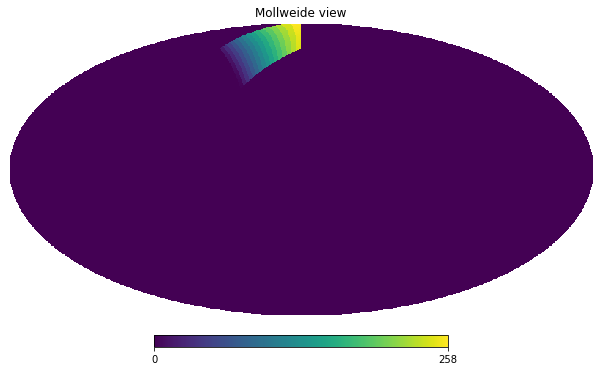

In [33]:
hp.mollview(hmap, nest=True)

In [30]:
arr

array([[ 0,  1,  4,  5],
       [ 2,  3,  6,  7],
       [ 8,  9, 12, 13],
       [10, 11, 14, 15]])

In [37]:
o_nside = 2**1
depth = 4
mm = one_pixel_fragmentation(o_nside = o_nside, o_pix = 12, depth = depth)

In [38]:
hmap = np.zeros(hp.nside2npix(o_nside * 2 ** depth))
for i in range(mm.shape[0]):
    for j in range(mm.shape[0]):
        hmap[mm[i, j]] = i + j +3

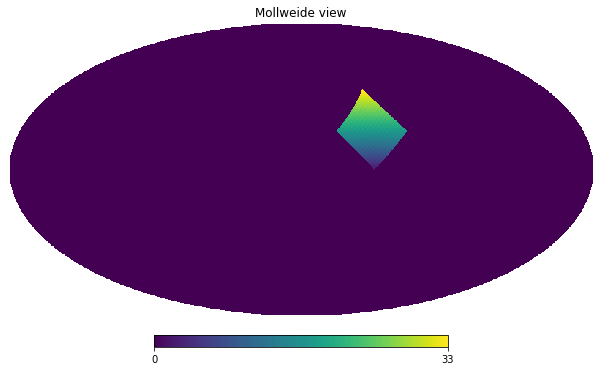

In [40]:
hp.mollview(hmap, nest=True)